In [1]:
import sys
import importlib
import numpy as np
import matplotlib.pyplot as plt
if sys.path[-1] != "..": sys.path.append("..")
import model
from common import cosmology, rh_neutrino
model = importlib.reload(model)

In [61]:
H_inf = 2e10
Gamma_phi = 1e8

chi0 = 1e7  # fakes m_a
f_a = 1e6
m_chi = 1e6
m_a = 1e-4

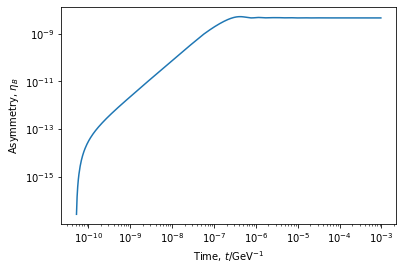

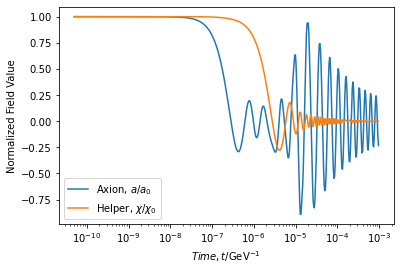

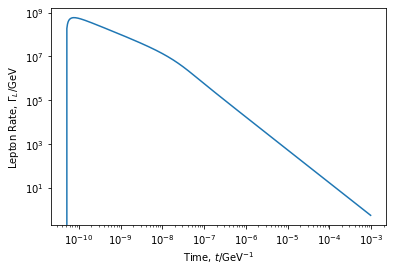

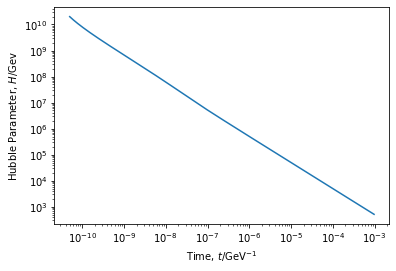

In [62]:
sol = model.simulate(m_a, f_a, Gamma_phi, H_inf, chi0, m_chi, converge=False, end=1e-3)

plt.loglog(sol.t, cosmology.n_L_to_eta_B_final(sol.T, sol.n_L))
plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
plt.ylabel(r"Asymmetry, $\eta_B$")
plt.show()

plt.semilogx(sol.t, sol.theta, label=r"Axion, $a / a_0$")
plt.semilogx(sol.t, sol.chi / chi0, label=r"Helper, $\chi / \chi_0$")
plt.xlabel(r"$Time, t / \mathrm{GeV}^{-1}$")
plt.ylabel(r"Normalized Field Value")
plt.legend()
plt.show()

sigma_eff = rh_neutrino.paper_sigma_eff
plt.loglog(sol.t, rh_neutrino.calc_Gamma_L(sol.T, sigma_eff))
plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
plt.ylabel(r"Lepton Rate, $\Gamma_L / \mathrm{GeV}$")
plt.show()

plt.loglog(sol.t, sol.H)
plt.xlabel(r"Time, $t / \mathrm{GeV}^{-1}$")
plt.ylabel(r"Hubble Parameter, $H / \mathrm{Gev}$")
plt.show()

In [ ]:
m_a_range = Gamma_phi_range = np.geomspace(min_val, H_inf, 20)
eta_B = np.array([[model.compute_B_asymmetry(m_a, f_a, Gamma_phi, H_inf, chi0) 
                   for m_a in m_a_range] for Gamma_phi in Gamma_phi_range])